# Важные нюансы при тестировании
## Основные проблемы при тестировании
### Планирование
1. **Неправильно выбранный/посчитанный период эксперимента:**

    - Запускать тест в праздники
    - Не учитывать сезонность
    
  **Решение:**  
        - Изначально делать корректный просчёт выборок
        - Закладывать 2–3 запасных рабочих дня между запусками тестов
        - Учитывать сезонность

2. **Не учитывать окно конверсии**

    Окно конверсии — это период времени, в котором мы смотрим за нашими юзерами, ожидая, что они совершит целевое действие.
    - Для покупок в играх может быть пару дней
    - При покупке техники 1-2 месяца
    - В недвижимости  6 месяцев +
    
  **Решение:**
        - Ждать пока у всех когорт пройдет окно конверсии
        - Либо обрезать когорты у которых не прошло достаточное время для окна конверсии

3. **Множественные изменения**

    В чистом A/B тесте группы не должны отличаться между собой больше чем на одно изменение.

    Иначе вы не сможете достоверно определить, что положительно или отрицательно повлияло на положительный/негативный результат теста.

    >Пример: На главной mail.ri убрали блок с рекламой под новостями + подняли ленту с рексистемами
    
  **Решение:**
        - Не делать больше одного отличия между группами .
        - В крайнем случае запускать A/B/C../N тест.

4. **Пересечения с другими тестами**

    При запуске нескольких тестов на одной странице одновременно вы:

    Смешаете пользователей и у вас не получится однородных выборок.

    Не сможете достоверно определить, что положительно или отрицательно повлияло на положительный/негативный результат теста.

  **Решение:**
        - Вести общий лог/план экспериментов и в целом синхронизироваться с другими командами


5. **Динамические правила**

    Идея A/B-теста = показ разных цен для пользователей с разных устройств
    
    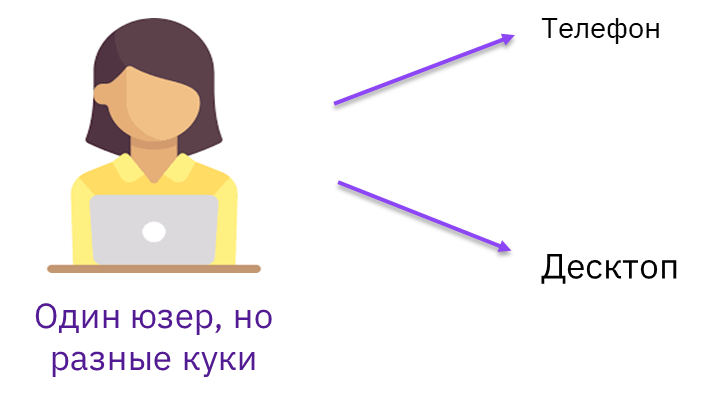

  **Решение:**
        - Не экспериментировать с таким видом тестов. Они могут вызвать негатив и плохую репутацию у сайта (продукта).

6. **Множественные сравнения**

    Если юзеры разбивается более чем на две подгруппы, вероятность получить ошибку первого рода при эксперименте нарастает экспоненциально: $1-(1-α)^m$, где m – количество сравнений.

    В случае, например, A/B/C теста у нас 3 попарных сравнения: A/B, A/C, B/C. Это означает, что при уровне значимости 95%, альфа будет:
$$\alpha = 1 - (1-0.05)^3 = 0.1426$$

  **Решение:**
        - По возможности не проводить без необходимости множественные сравнения
        - Брать ошибку первого рода:
$$\frac{alpha}{n}$$
        или сразу, например, 0,01% - это понижает мощность теста


### Подготовка продуктовых изменений
1. **Забывают логировать важную информацию**

    Очень частая проблема даже в продуктах с высоким уровнем аналитической культуры.

    Может лишить нас возможности корректно проанализировать тест или усложнит сам процесс.

  **Решение:**
        - Сделать чек-лист для менеджеров
        - На этапе планирования и подготовки изменений обязательно подключать аналитиков



2. **Не тестируют изменения качественно** - Некачественная проверка изменения на предмет соответствия ТЗ

    Оунер процесса, который лучше всех знает задумку теста должен проверять новые функции перед запуском.

    Это поможет уберечь ваш продукт от лишних репутационных рисков и сделать и провести качественный тест.

    Именно оунер должен проверить то, что сделано по ТЗ на предмет соответствия цели.

  **Решение:**
        - Выделять ресурсы тестировщиков
        - Самому тестировать изменение на предмет соответствия ТЗ
        - Готовится к поэтапной раскатке изменения в будущем




### Запуск теста
1. **Преждевременно завершать тест/ продолжать излишне долго**
    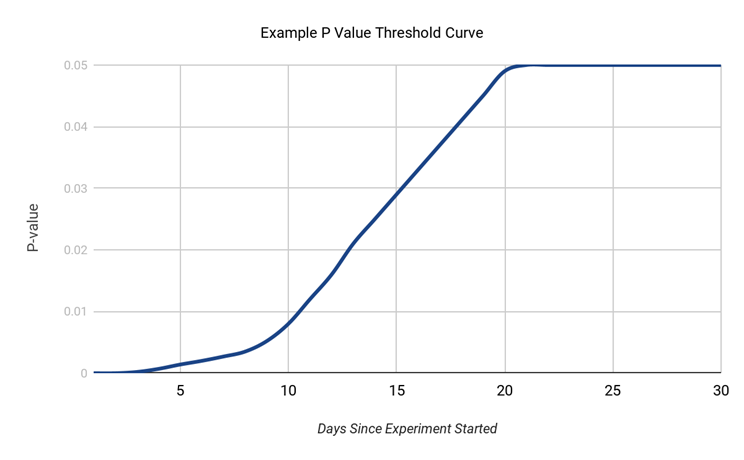
    
**Не хватает данных для определения стат. значимости**:
- Преждевременно законченный тест - не валидные результаты.
- Продолжение теста в ожидании стат значимости - шанс потратить деньги и время компании не получив результата.

**Проблема подглядывания**

- Peeking problem (проблема подглядывания) проявляется, когда вы проверяете промежуточные результаты с готовностью принять решение: раскатить одну из версий, если различие между тестом и контролем окажется значимым.
    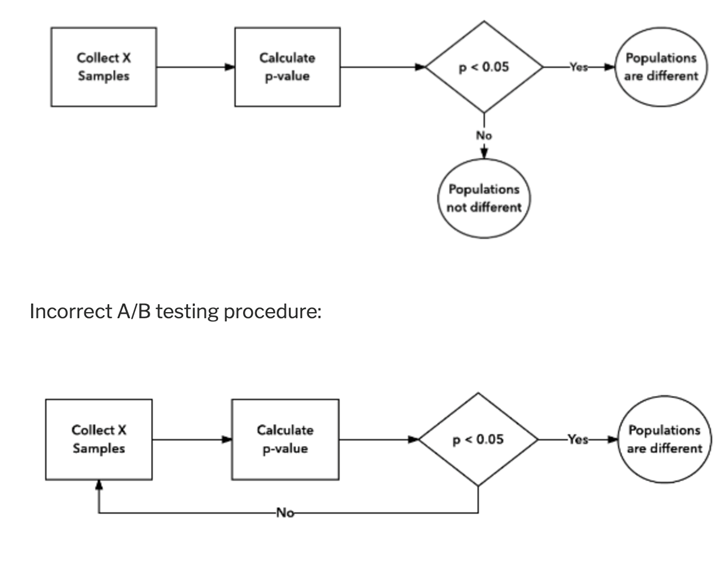

  **Решение:**
        - Мониторить корректность теста и ключевые метрики можно и нужно .
        - Принимать решения на основе неполных данных нельзя.
        - Нужно ждать завершения рассчитанного срока и завершать тест вне зависимости от наличия отсутствия статистической значимости.

  

2. **Внесение изменений в процессе**

    Не очень хорошая практика, которая может изменить опыт пользователей и затруднить анализ эксперимента.
    
  **Решение:**
        - Выделять время на планирование теста и четко понимать заранее, что вы хотите сделать.


3. **Плохое сплитование трафика**

Неравномерное распределение трафика может сильно исказить результаты. 

Такое может происходить из-за недоработок или багов инструмента для проведения A/B-тестов.

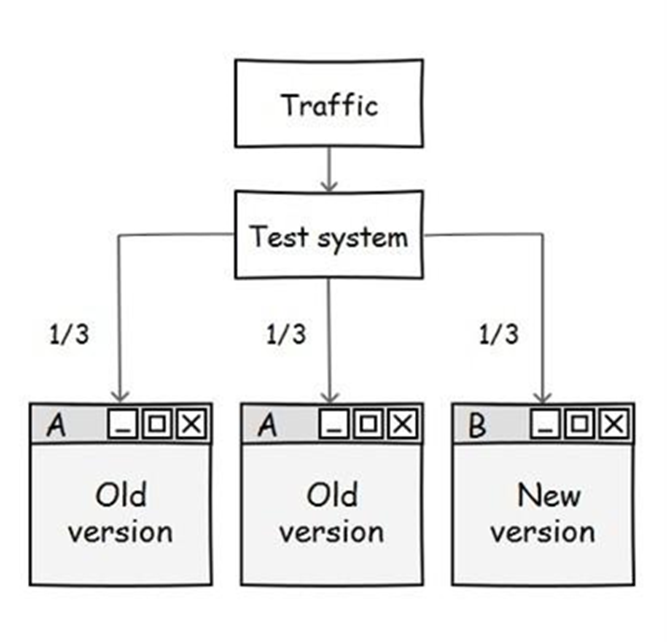

>Пример: Например, в одной из групп преобладает аудитория из МСК/СПБ , в другой же наоборот больше людей из регионов.

  **Решение:**
  
        - Раз в квартал проводить A/A/B-тесты. Или простой A/A-тест для проверки инструментария.
        
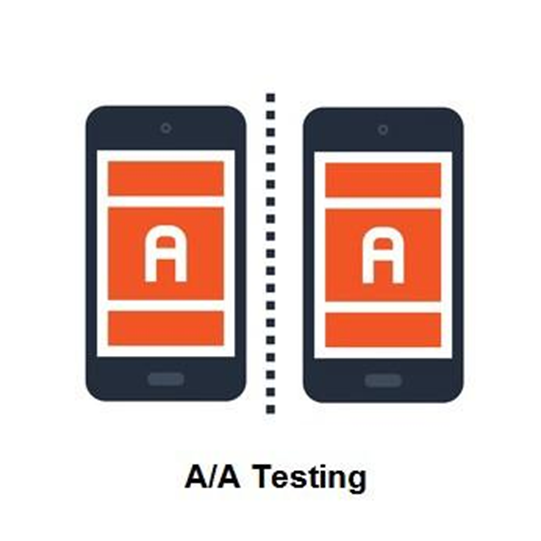



### Анализ результатов
1. **Поиск стат значимости перебором различных сегментов/метрик**
Перебирая постфактум разные срезы, сегменты и метрики в поисках стат значимости мы пытаемся любыми силами подогнать факты под теорию 
Мы совершаем множественные сравнения

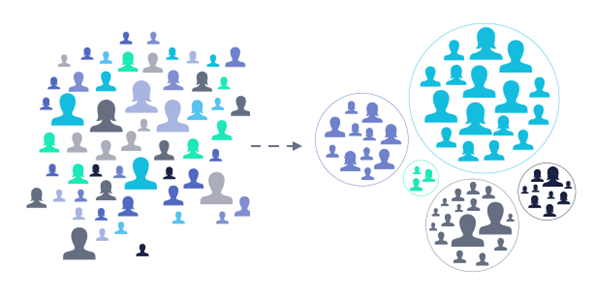

  **Решение:**
  
        - Можно смотреть важные срезы по полу/возрасту мобила/десктоп и если это обосновывается с идеей эксперимента.
        - Можно использовать интересные файндинги для генерации гипотез будущих researches.
        - Нельзя пытаться использовать такие срезы при принятии решений по эксперименту, если вы просто перебирали разные комбинации и обнаружили где-то стат значимость.


2. **Отсутствие критериев принятия решения**
Без четко определенных критериев принятия решений - вы рискуете зря потратить время на тест и после его завершения плохо понимать, что нужно делать.

При каких развитиях событий и получения каких результатов какие решения я принимаю (например, если через неделю метрика C1 ниже на 1 п.п., то сразу же вырубаем эксперимент) 

  **Решение:**
  
        - При планировании эксперимента заранее определить для себя критерии принятия решений в зависимости от различных исходов теста и влияния продуктовых фич на метрики.


## Шаблон дизайна эксперимента
- Это полноценный документ. 
- Это исторические данные.
- Это хорошая практика, чтобы не замыкать на себе процессы, если вы решите сменить место работы.


1. Гипотеза:<br>
Если на странице https://mail.ru/ поднять блок c рекомендательной лентой Пульс  на первый экран, то таймспент Главной вырастет на 15%,  при этом ARPU не просядет потому что люди будут больше проводить время в ленте читая ленту рекомендаций  и смотря видео в ней, а также чаще возвращаться на Главную.

2. Что делаем:<br>
Контрольная версия: оставляем текущий вид страницы.
Тестовая версия: поднимаем блок c рекомендательной лентой Пульс  на первый экран

3. На каких пользователях тестируем: <br>
На всех пользователях Главной на 10% трафика

4. Метрики:<br>
Таймспент Главной — primary.
ARPU — secondary.

5. План действий: <br>
Если наш эксперимент будет положительным и мы зафиксируем ожидаемое улучшение в в ключевых метриках и не посадим добавочные, то масштабируем изменение и «выкатываем» его на всех пользователей.
Если основные метрики падают или растут недостаточно, либо добавочные метрики падают, откатываем эксперимент. 


## Чек-лист
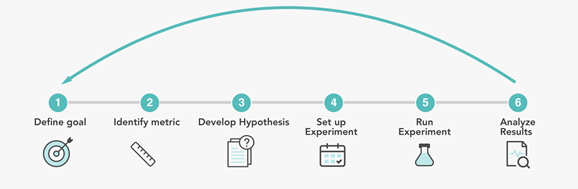

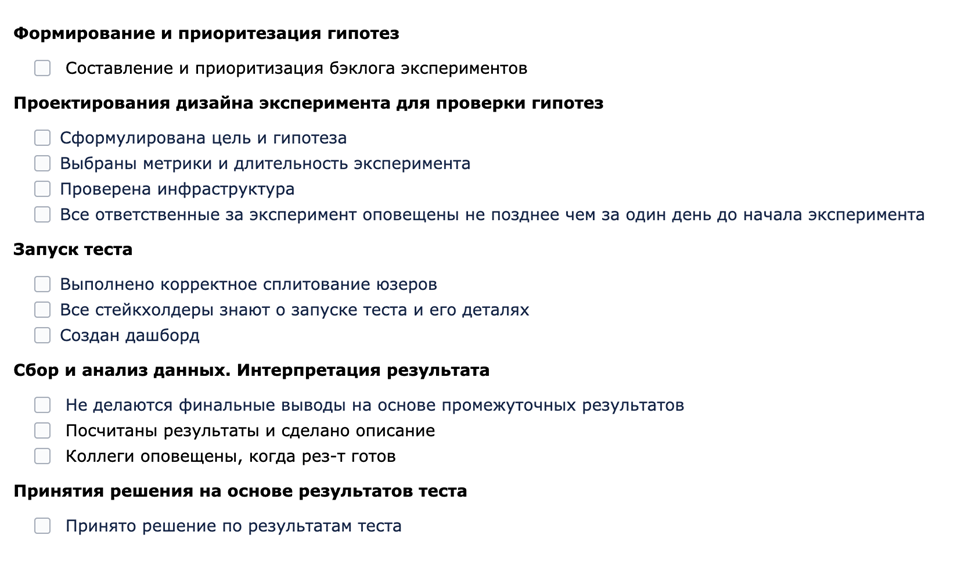


# Практика
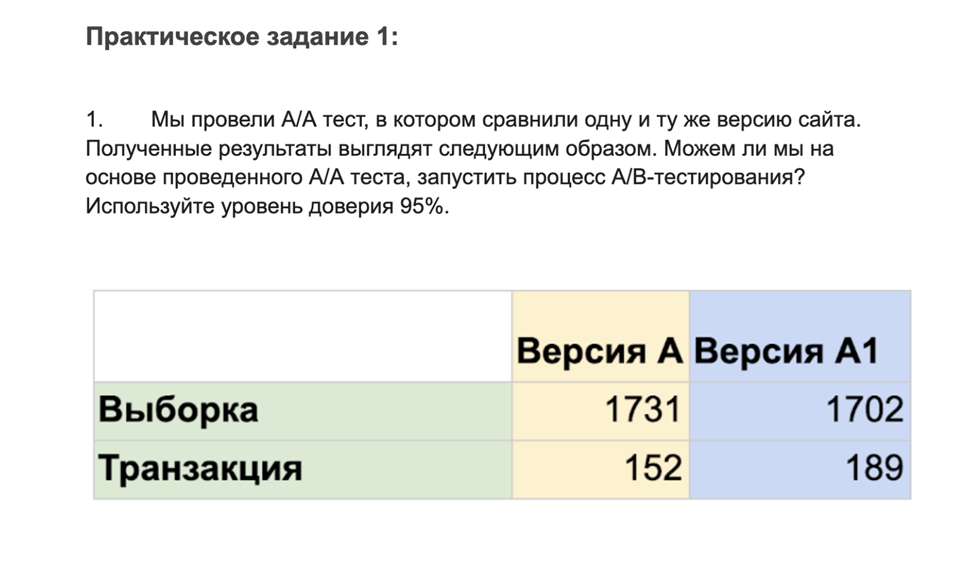

https://www.evanmiller.org/ab-testing/chi-squared.html

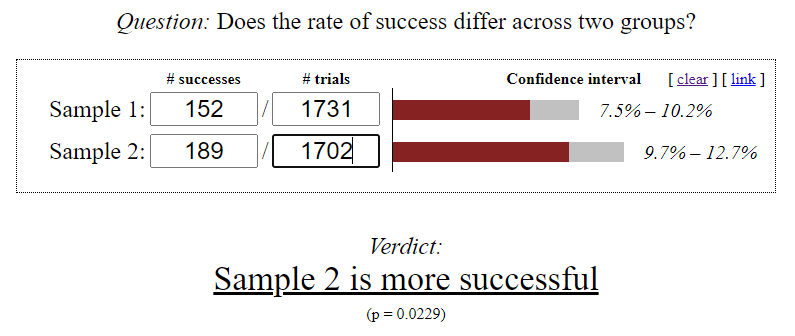

Принимаем альтернативную гипотезу, что есть различия в группах.

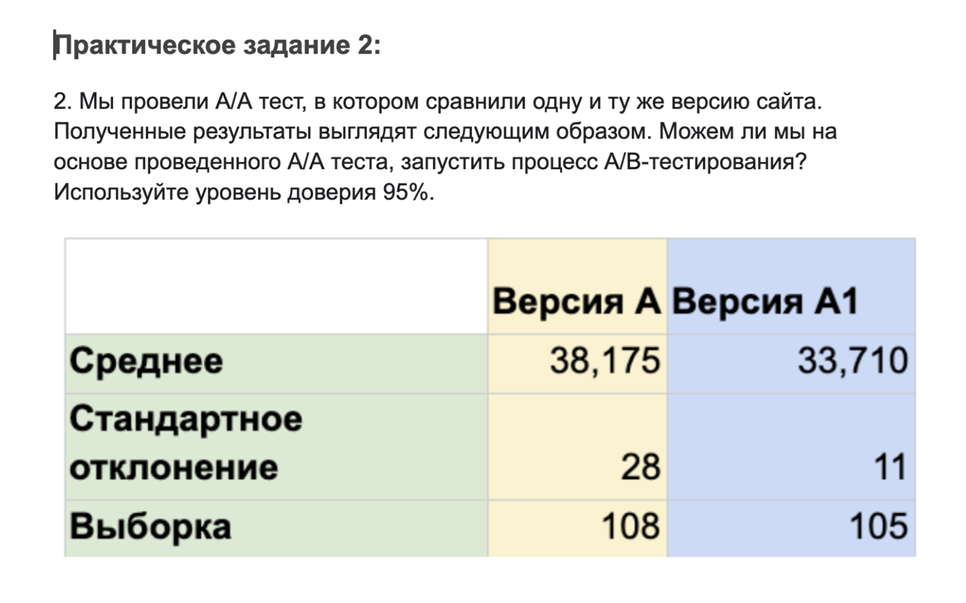
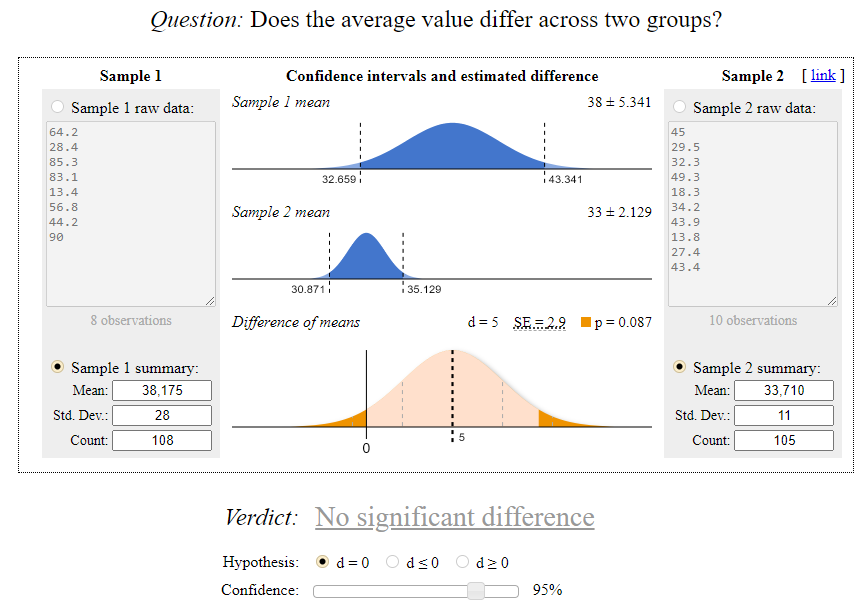

Значимых отличий нет.

## Практическое задание 3:


Мы запустили A/B-тест. На его проведение мы собираемся потратить 1 неделю, на каждую выборку направить по 10000 юзеров. На третий день, продакт посмотрел на промежуточные результаты. На этот момент в каждой выборке было по 3000 юзеров, а результат в конверсиях был статистически значимым в пользу версии B. Можем ли мы на основе таких данных выпустить версию B на всех юзеров?

Нет, нужно дождаться окончания эксперимента. Это называется "Эффект подглядывания" - попытка досрочно оценить результаты.

## Практическое задание 4:
Мы провели A/B тест, в котором изменили главную страницу сайта. То есть, юзеры видят разные версии сайта сразу, как заходят на него. Получили следующие результаты. Разница в конверсиях в заказ оказалась статистически значимой. Какую версию в итоге выберете?

||Версия A|Версия B|
|:---|---:|---:|
|Посещение|4272|4263|
|Добавление в корзину|623|694|
|Подтверждение транзакции|358|388|
|Транзакция|340|345|

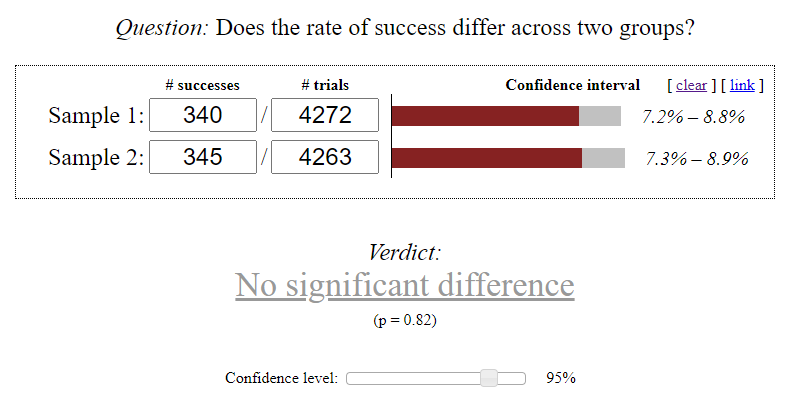

Изменений в конверсию в транзакцию нет.

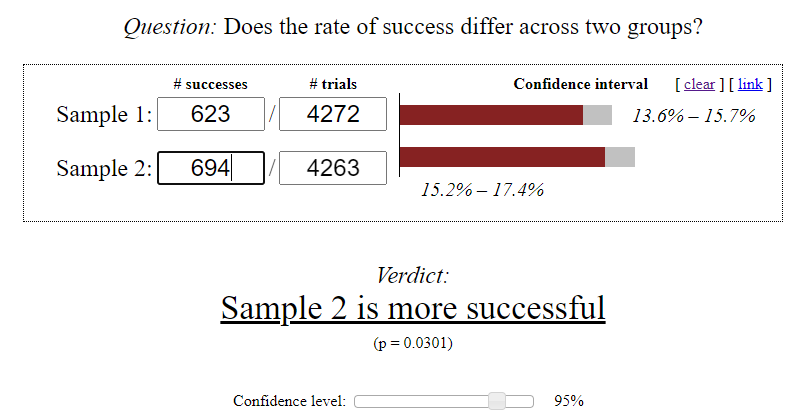

Есть разница в момент добавления в корзину. Рекомендуем версию B.

## Практическое задание 5:
Мы провели A/B тест, в котором изменили элементы после добавления товара в корзину. То есть, юзеры видят разные версии сайта после того, как добавят товары в корзину. Получили следующие результаты. Какую версию в итоге выберете?

||Версия A|Версия B|
|:---|---:|---:|
|Посещение|6351|6442|
|Добавление в корзину|1754|1902|
|Подтверждение транзакции|1025|1099|
|Транзакция|623|642|

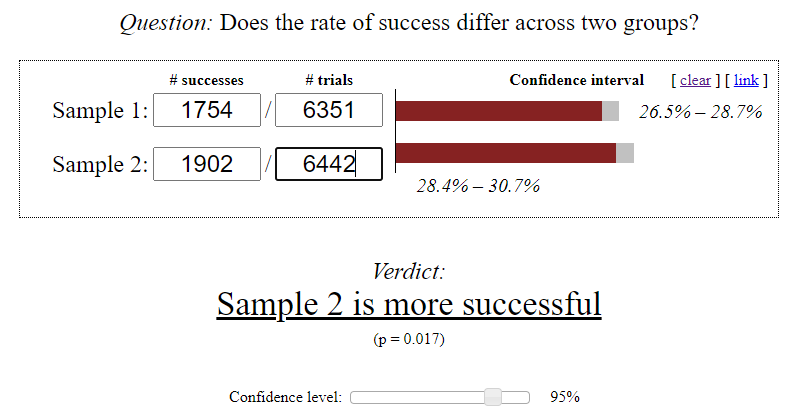
Разница в группах. A/A тест не пройден, интерпертировать результаты невозможно.